# Clustering algorithms

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Hierarchical clustering

For this problem we will use dataset containing 6 binary attributes (1 – "no", 2 – "yes") for 20 animals. These attributes are as follows: warm-blooded, flying, verterbrate, endangered, living in groups and having hair. The dataset is effective for illustrating hierarchical clustering. We can begin with displaying the whole dataset.

In [2]:
df_animals = pd.read_csv('animals.csv', sep=';', engine='python')
df_animals

,war,fly,ver,end,gro,hai
ant,1,1,1,1.0,2.0,1
bee,1,2,1,1.0,2.0,2
cat,2,1,2,1.0,1.0,2
cpl,1,1,1,1.0,1.0,2
chi,2,1,2,2.0,2.0,2
cow,2,1,2,1.0,2.0,2
duc,2,2,2,1.0,2.0,1
eag,2,2,2,2.0,1.0,1
ele,2,1,2,2.0,2.0,1
fly,1,2,1,1.0,1.0,1


There are some missing values in the dataset so we need to handle them. It's one of the greatest challenges during work with real world data, because making the right decision on how to handle it generates robust data models. For this example we will fill missing values with a constant 1.5 so the distance to both real values (1 and 2) is the same.

In [3]:
df_animals = df_animals.fillna(1.5)

Now the dataset can be visualized using dendrogram with heatmap. A dendrogram allows to illustrate the hierarchical organisation of several entities. It is also a good practice to add the corresponding heatmap to understand if the structure is logical.

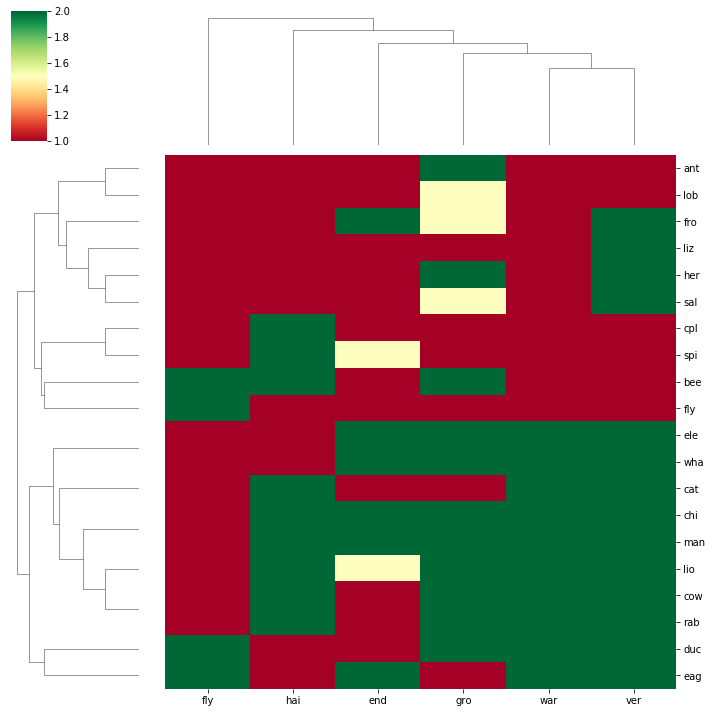

In [4]:
sns.clustermap(df_animals, cmap='RdYlGn')
plt.show()

The picture above can tell us that it's possible to group the animals in four families: cold-blooded mostly vertebrate without hair, cold-blooded invertebrate, warm-blooded that can't fly and mostly have hair and warm-blooded that can fly and don't have hair.

## K-means clustering

To show how K-means algorithm works we will use Iris dataset. First we will import the data and display some records.

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
df_iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['class'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Now we will define target and predictors.

In [6]:
X = df_iris.iloc[:, :-1]
y = df_iris.iloc[:, -1]

We can take a look at our data. To visualize the dataset we will apply pair plots which are powerful tool to explore the distributions and relationships between variables. 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


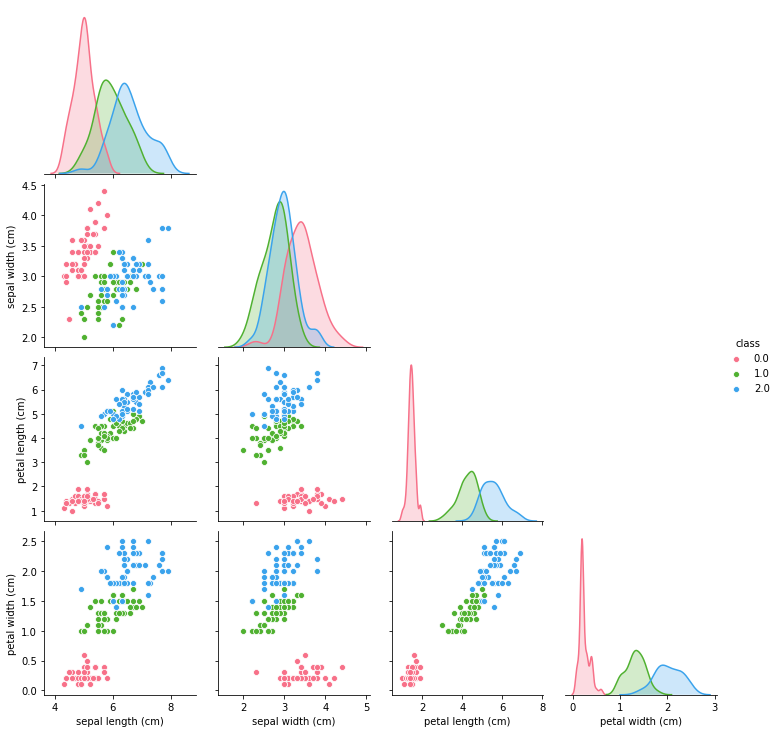

In [7]:
sns.pairplot(df_iris, vars=X, hue='class', palette='husl', corner=True)
plt.show()

The scatter pair plots suggest there are some pairs of explanatory variables that allow for better clustering. Now we will investigate how the choice of these variables affect the performance of the K-means clustering. To do so, we will create objects with all n-element combinations of features and we will be iterating through every combination to apply the algorithm to it and check the accuracy. It is worth noting that normally clustering analysis doesn't have any solid evaluation metric and there is no right answear in terms of number of clusters that we should have in a problem. But we are dealing with "toy dataset" and we have the labels and $k$ number ($k = 3$) so we will simply measure an accuracy of the model.

Disclaimer: The code below might be not entirely intuitive so more difficult fragments are additionally commented.

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from itertools import combinations

# We want to have a list of columns' numbers 
columns_num = [i for i in range(0, X.shape[1])]

# Iterating through the number of elements in combinations
for i in range(2, X.shape[1] + 1):
    combs = combinations(columns_num, r=i)

    for comb in combs:
        # Selecting every combination of features
        X_sel = df_iris.iloc[:, lambda df: list(comb)]
        
        clf = KMeans(n_clusters=3, random_state=0)
        clf.fit(X_sel)
        
        features_names = list(X_sel.columns)
        accuracy = accuracy_score(clf.labels_, y)
        print('{} --> Accuracy: {}'.format(features_names, accuracy))

['sepal length (cm)', 'sepal width (cm)'] --> Accuracy: 0.5133333333333333
['sepal length (cm)', 'petal length (cm)'] --> Accuracy: 0.44666666666666666
['sepal length (cm)', 'petal width (cm)'] --> Accuracy: 0.12666666666666668
['sepal width (cm)', 'petal length (cm)'] --> Accuracy: 0.9266666666666666
['sepal width (cm)', 'petal width (cm)'] --> Accuracy: 0.3933333333333333
['petal length (cm)', 'petal width (cm)'] --> Accuracy: 0.37333333333333335
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'] --> Accuracy: 0.88
['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)'] --> Accuracy: 0.8266666666666667
['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'] --> Accuracy: 0.8933333333333333
['sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] --> Accuracy: 0.03333333333333333
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] --> Accuracy: 0.09333333333333334


We can see the model shows the best performance (93% accuracy) when dealing with "sepal width" and "petal length" features. For all the features the algorithm doesn't group the data well so the accuracy doesn't even reach 10%. At the end we can visualize the case with the highest accuracy and compare real clusters with clusters determined by our model.

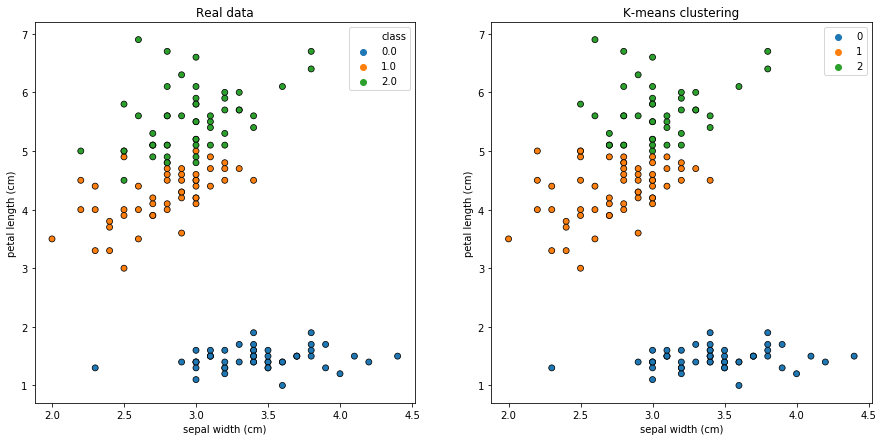

In [9]:
X_best = df_iris[['sepal width (cm)', 'petal length (cm)']]

clf = KMeans(n_clusters=3, random_state=0)
clf.fit(X_best)

fig = plt.figure(figsize=(15, 7))

ax1 = fig.add_subplot(121)
plt.title('Real data')
sns.scatterplot(data=df_iris, 
                x='sepal width (cm)', 
                y='petal length (cm)', 
                hue='class', 
                palette='tab10', 
                legend='full', 
                edgecolor='black')

ax2 = fig.add_subplot(122)
plt.title('K-means clustering')
sns.scatterplot(data=df_iris, 
                x='sepal width (cm)', 
                y='petal length (cm)', 
                hue=clf.labels_, 
                palette='tab10', 
                legend='full', 
                edgecolor='black')

plt.show()